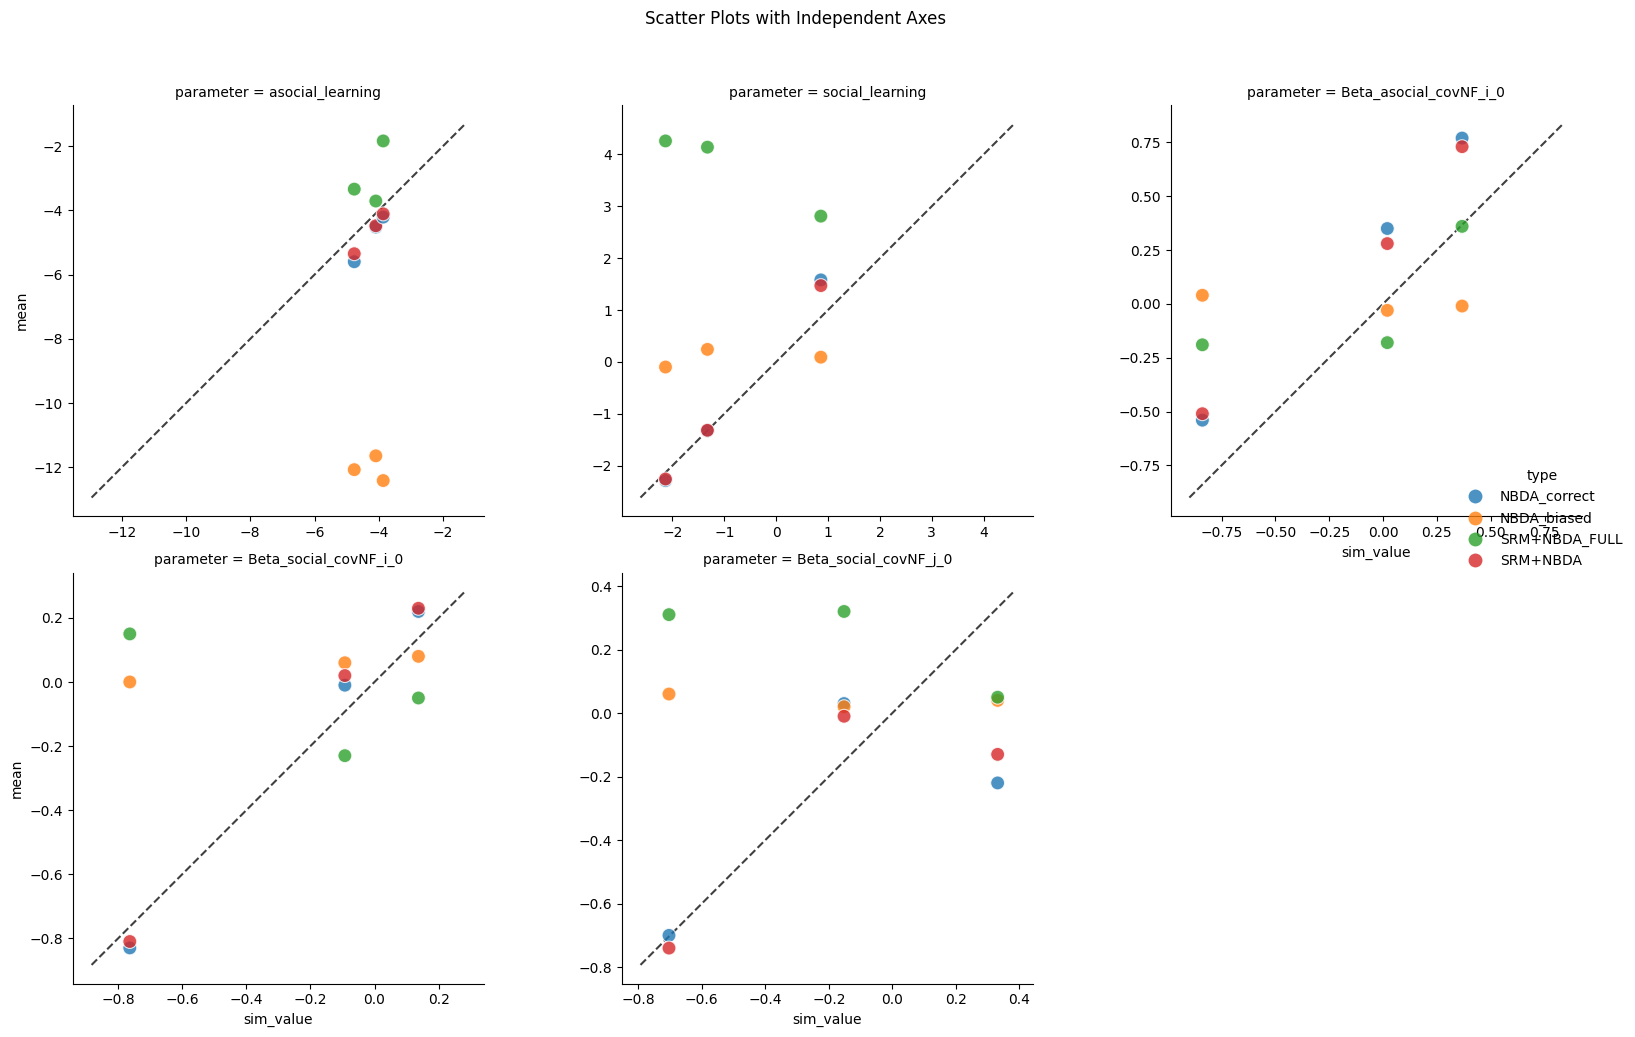

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load data
df = pd.read_csv('SRM_sim.csv')
df = df.rename(columns={'Unnamed: 0': 'parameter'})
g = sns.relplot(
    data=df,
    x='sim_value',
    y='mean',
    hue='type',        # Color points by the 'type' column
    col='parameter',   # Create a new subplot for each unique 'parameter'
    col_wrap=3,        # Wrap the subplots into rows after 3 columns
    kind='scatter',
    s=100,             # Increase marker size for better visibility
    alpha=0.8,
    # --- This is the key change ---
    # Pass arguments to the underlying FacetGrid to make axes independent
    facet_kws={'sharex': False, 'sharey': False}
)

# Your loop for adding the 1:1 line now works perfectly for each subplot's unique scale
for ax in g.axes.flatten():
    # This check is useful if you have an empty subplot (e.g., 5 plots with col_wrap=3)
    if not ax.has_data():
        continue
        
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal', adjustable='box')

# Add a title and adjust layout
g.fig.suptitle('Scatter Plots with Independent Axes', y=1.03)
g.fig.tight_layout()

plt.show()